Status - credit status

Seniority - job seniority (years)

Home - type of home ownership

Time - time of requested loan

Age - client's age

Marital - marital status

Records - existence of records

Job - type of job

Expenses - amount of expenses

Income - amount of income

Assets - amount of assets

Debt - amount of debt

Amount - amount requested of loan

Price - price of good

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data cleaning and preparation

In [2]:
df = pd.read_csv('CreditScoring.csv')
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [3]:
df.columns = df.columns.str.lower()
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [4]:
df.status

0       1
1       1
2       2
3       1
4       1
       ..
4450    2
4451    1
4452    2
4453    1
4454    1
Name: status, Length: 4455, dtype: int64

In [5]:
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [6]:
for col in ['status', 'home', 'marital', 'records', 'job']:
    print(df[col].value_counts())


status
1    3200
2    1254
0       1
Name: count, dtype: int64
home
2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: count, dtype: int64
marital
2    3241
1     978
4     130
3      67
5      38
0       1
Name: count, dtype: int64
records
1    3682
2     773
Name: count, dtype: int64
job
1    2806
3    1024
2     452
4     171
0       2
Name: count, dtype: int64


In [7]:
status_values = {
    1: 'ok', 
    2:'default', 
    0:'unknown'
    }
df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unknown'
}
df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unknown'
}
df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unknown'
}
df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unknown'
}
df.job = df.job.map(job_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


Missing values

In [9]:
df.describe().round() #999999.0 is actualy missing values

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
df.income.replace(to_replace= 99999999, value = np.nan)

0       129.0
1       131.0
2       200.0
3       182.0
4       107.0
        ...  
4450     92.0
4451     75.0
4452     90.0
4453    140.0
4454    140.0
Name: income, Length: 4455, dtype: float64

In [11]:
df.income.replace(to_replace= 99999999, value = np.nan).max()

959.0

In [12]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(to_replace= 99999999, value = np.nan)

In [13]:
df.describe().round() 

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [14]:
#status 0 (unknown) is also missing value
df.status.value_counts()


status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64

In [15]:
df[ df.status != 'unknown'].reset_index( drop = True)  #removed unknown status

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


Split the data into train, validation and test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [18]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,2,owner,36,37,married,no,fixed,60,125.0,2000.0,0.0,450,1490
1,default,2,owner,30,32,married,no,fixed,90,74.0,1500.0,0.0,500,650
2,ok,2,rent,60,28,single,no,fixed,47,115.0,0.0,0.0,1000,1015
3,ok,8,other,30,40,married,no,fixed,45,148.0,0.0,0.0,850,1370
4,default,12,owner,60,47,married,yes,freelance,75,285.0,20000.0,0.0,1440,1440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,ok,10,owner,6,52,married,no,freelance,35,142.0,24000.0,0.0,300,1064
887,default,26,private,60,41,separated,yes,fixed,35,201.0,4700.0,3100.0,2400,2700
888,ok,7,owner,60,47,married,no,freelance,45,0.0,9000.0,0.0,1500,1661
889,ok,22,rent,48,46,married,no,fixed,86,110.0,0.0,0.0,1150,1528


In [19]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [20]:
y_test  # 0-ok, 1-default

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [21]:
del df_train['status']
del df_val['status']
del df_test['status']

Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer #for categorical variables

In [23]:
train_dicts = df_train.fillna(0).to_dict(orient='records')  #orient='records' daje svaki red zapisan u obliku rečnika i sada imamo listu rečnika
train_dicts

[{'seniority': 3,
  'home': 'rent',
  'time': 36,
  'age': 61,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 41,
  'income': 57.0,
  'assets': 12000.0,
  'debt': 0.0,
  'amount': 2500,
  'price': 3559},
 {'seniority': 5,
  'home': 'rent',
  'time': 48,
  'age': 30,
  'marital': 'separated',
  'records': 'yes',
  'job': 'partime',
  'expenses': 39,
  'income': 41.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1300,
  'price': 1600},
 {'seniority': 15,
  'home': 'owner',
  'time': 60,
  'age': 32,
  'marital': 'divorced',
  'records': 'no',
  'job': 'freelance',
  'expenses': 35,
  'income': 0.0,
  'assets': 6000.0,
  'debt': 3300.0,
  'amount': 1550,
  'price': 1612},
 {'seniority': 2,
  'home': 'rent',
  'time': 12,
  'age': 47,
  'marital': 'married',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 103,
  'income': 426.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 350,
  'price': 450},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,


In [24]:
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

In [25]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unknown', 'income', 'job=fixed',
       'job=freelance', 'job=others', 'job=partime', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unknown', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Ww train our model and now we want to test it on validation set 

In [27]:
val_dicts = df_val.fillna(0).to_dict(orient= 'records')
X_val = dv.transform(val_dicts)  #we use only transform on validation set
X_val

array([[3.7e+01, 1.0e+03, 5.0e+03, ..., 0.0e+00, 3.0e+00, 3.6e+01],
       [2.4e+01, 1.2e+03, 3.5e+03, ..., 0.0e+00, 1.0e+00, 3.6e+01],
       [4.0e+01, 7.0e+02, 0.0e+00, ..., 1.0e+00, 1.7e+01, 2.4e+01],
       ...,
       [3.1e+01, 1.5e+03, 9.0e+03, ..., 1.0e+00, 1.0e+00, 6.0e+01],
       [2.5e+01, 8.5e+02, 5.0e+03, ..., 0.0e+00, 6.0e+00, 2.4e+01],
       [2.4e+01, 4.0e+02, 0.0e+00, ..., 0.0e+00, 1.0e+00, 2.4e+01]])

In [28]:
y_val_pred = dt.predict_proba(X_val)

In [29]:
y_val_pred #ovde vraća verovatnoće 0 ili 1 jer nismo podešavali parametre kao što je max_depth

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [30]:
y_val_pred = dt.predict_proba(X_val)[:, 1] #uzimamo drugu kolonu tj.verovatnoću da pripada klasi 1

In [31]:
from sklearn.metrics import roc_auc_score

In [32]:
roc_auc_score(y_val, y_val_pred) #not impressive

0.6605551366518745

AUC ROC score for train data

In [33]:
y_train_pred = dt.predict_proba(X_train)[:, 1]
y_train_pred

array([1., 1., 0., ..., 0., 0., 0.])

In [34]:
roc_auc_score(y_train, y_train_pred) #on train data set we have auc roc score 1, but on validation set is only 0.67, so it is probably overfitting

1.0

Finding the best parameter for depth of dt

In [35]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
y_train_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print('train: ', auc)

y_val_pred = dt.predict_proba(X_val)[:, 1] 
auc = roc_auc_score(y_val, y_val_pred) 
print('val: ', auc)  #with max_depth = 3 our model performes better, there is no overfitting

train:  0.7660925386129352
val:  0.763427236430611


Visualization Decision Trees 

In [37]:
from sklearn.tree import export_text

In [38]:
print(export_text(dt, feature_names = dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- income <= 50.50
|   |   |   |--- class: 1
|   |   |--- income >  50.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 99.50
|   |   |   |--- class: 1
|   |   |--- income >  99.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- class: 0
|   |   |--- income >  73.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- time <= 27.00
|   |   |   |--- class: 0
|   |   |--- time >  27.00
|   |   |   |--- class: 1



Decision Tree Learning Algorithm

In [39]:
# #exampe
# data = [
#     [8000, 'default'],
#     [2000, 'default'],
#     [0, 'default'],
#     [5000, 'ok'],
#     [5000, 'ok'],
#     [4000, 'ok'],
#     [9000, 'ok'],
#     [3000, 'default']
# ]

# df_example = pd.DataFrame(data, columns = ['assets', 'status'])
# df_example

In [40]:
# df_example.sort_values('assets')

In [41]:
# Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [42]:
# from IPython.display import display  #da bismo pokazali df_left i df_right u loop funkciji
# for T in Ts:
#     print(T)
#     df_left = df_example[df_example.assets <= T]
#     df_right = df_example[df_example.assets > T]

#     display(df_left)
#     display(df_right)

#     print()

In [43]:
# T = 4000
# df_left = df_example[df_example.assets <= T]
# df_right = df_example[df_example.assets > T]

# display(df_left)
# print(df_left['status'].value_counts(normalize = True))
# display(df_right)
# print(df_right['status'].value_counts(normalize = True))  #sa normlize=True dobijamo procenat tačnosti


In [44]:
# for T in Ts: #sve ovo gore radimo u loop, da vidimo koji treshold je najbolji
#     print(T)
#     df_left = df_example[df_example.assets <= T]
#     df_right = df_example[df_example.assets > T]

#     display(df_left)
#     print(df_left['status'].value_counts(normalize = True))
#     display(df_right)
#     print(df_right['status'].value_counts(normalize = True))


videli smo da je najbolji T  3000, šta kada imamo još kolona?

In [45]:
# data = [
#     [8000, 3000, 'default'],
#     [2000, 1000, 'default'],
#     [0, 1000, 'default'],
#     [5000, 1000, 'ok'],
#     [5000, 1000, 'ok'],
#     [4000, 1000, 'ok'],
#     [9000, 500, 'ok'],
#     [3000, 2000, 'default']
# ]

# df_example = pd.DataFrame(data, columns = ['assets', 'debt','status'])
# df_example

In [46]:
# df_example.sort_values('debt')

In [47]:
# thresholds = {
#     'assets': [0, 2000, 3000, 4000, 5000, 8000],
#     'debt': [500, 1000, 2000]
# }

In [48]:
# for feature, Ts in thresholds.items():
#     print('---------------------')
#     print(feature)
#     for T in Ts: #sve ovo gore radimo u loop, da vidimo koji treshold je najbolji
#         print(T)
#         df_left = df_example[df_example[feature] <= T]
#         df_right = df_example[df_example[feature] > T]

#         display(df_left)
#         print(df_left['status'].value_counts(normalize = True))
#         display(df_right)
#         print(df_right['status'].value_counts(normalize = True))
#         print()

Decision Trees Parameter Tuning
    -selecting max_depth
    -selecting min_samples_leaf

In [49]:
# for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
#     dt = DecisionTreeClassifier(max_depth = d)
#     dt.fit(X_train, y_train)

#     y_pred = dt.predict_proba(X_val)[:, 1]
#     auc = roc_auc_score(y_val, y_pred)

#     print('%4s --- %.3f' % (d, auc))  #between 4 and 6 is the best 

In [50]:
# for d in [4, 5, 6]:
#     for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
#         dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s)
#         dt.fit(X_train, y_train)

#         y_pred = dt.predict_proba(X_val)[:, 1]
#         auc = roc_auc_score(y_val, y_pred)

#         print('(%4s, %3d) --- %.3f' % (d, s, auc)) 

In [51]:
# scores = []

# for d in [4, 5, 6]:
#     for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
#         dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s)
#         dt.fit(X_train, y_train)

#         y_pred = dt.predict_proba(X_val)[:, 1]
#         auc = roc_auc_score(y_val, y_pred)

#         scores.append((d, s, auc))

# df_scores = pd.DataFrame(scores, columns = ['max_depth', 'min_samples_leaf', 'auc']) 
# df_scores.sort_values(by = 'auc', ascending=False)

In [52]:
# df_scores_pivot = df_scores.pivot( 
#     index = 'min_samples_leaf',
#     columns = ['max_depth'],
#     values = ['auc']
# )
# df_scores_pivot.round(3)  #pivot table is just for visualization and now we can make heatmap of this

In [53]:
# sns.heatmap(df_scores_pivot, annot= True, fmt = '.3f')

In [54]:
# this df is small so we can try more combinations with max_depth and min_samples_leaf

scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

df_scores = pd.DataFrame(scores, columns = ['max_depth', 'min_samples_leaf', 'auc']) 
df_scores.sort_values(by = 'auc', ascending=False)

,max_depth,min_samples_leaf,auc
50,15.0,20,0.803258
23,6.0,20,0.801787
41,10.0,20,0.801784
68,NaN,20,0.801345
59,20.0,20,0.801002
...,...,...,...
17,5.0,500,0.671368
8,4.0,500,0.671368
71,NaN,500,0.671368
54,20.0,1,0.666461


In [55]:
df_scores_pivot = df_scores.pivot( 
    index = 'min_samples_leaf',
    columns = ['max_depth'],
    values = ['auc']
)
df_scores_pivot.round(3) 

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.664  0.779  0.783  0.772  0.761  0.701  0.675  0.666
2                 0.697  0.779  0.782  0.776  0.762  0.715  0.694  0.689
5                 0.743  0.779  0.786  0.785  0.779  0.741  0.742  0.747
10                0.767  0.774  0.784  0.792  0.794  0.771  0.769  0.763
15                0.785  0.771  0.780  0.795  0.795  0.791  0.783  0.782
20                0.801  0.784  0.785  0.802  0.800  0.802  0.803  0.801
100               0.794  0.767  0.786  0.793  0.795  0.794  0.794  0.794
200               0.789  0.765  0.778  0.789  0.789  0.789  0.789  0.789
500               0.671  0.671  0.671  0.671  0.671  0.671  0.671  0.671

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

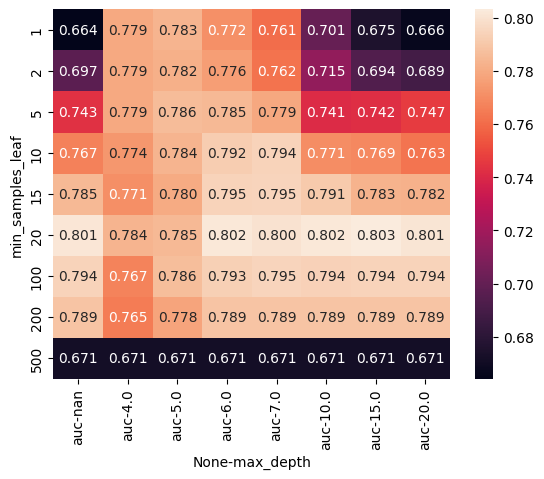

In [56]:
sns.heatmap(df_scores_pivot, annot= True, fmt = '.3f')

In [57]:
#finally training Decision Tree
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)

In [58]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8024635656806636